### Red Wine Quality Prediction
Problem Statement:
The dataset is related to red and white variants of the Portuguese "Vinho Verde" wine. Due to privacy and logistic issues, only physicochemical (inputs) and sensory (the output) variables are available (e.g. there is no data about grape types, wine brand, wine selling price, etc.).

This dataset can be viewed as classification task. The classes are ordered and not balanced (e.g. there are many more normal wines than excellent or poor ones). Also, we are not sure if all input variables are relevant. So it could be interesting to test feature selection methods.

Attribute Information

Input variables (based on physicochemical tests):
1 - fixed acidity
2 - volatile acidity
3 - citric acid
4 - residual sugar
5 - chlorides
6 - free sulfur dioxide
7 - total sulfur dioxide
8 - density
9 - pH
10 - sulphates
11 - alcohol
Output variable (based on sensory data):
12 - quality (score between 0 and 10)

What might be an interesting thing to do, is to set an arbitrary cutoff for your dependent variable (wine quality) at e.g. 7 or higher getting classified as 'good/1' and the remainder as 'not good/0'.
This allows you to practice with hyper parameter tuning on e.g. decision tree algorithms looking at the ROC curve and the AUC value.

You need to build a classification model. 

Inspiration

Use machine learning to determine which physiochemical properties make a wine 'good'!



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from sklearn.linear_model import LogisticRegression,Lasso,LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.decomposition import PCA
from scipy.stats import zscore
from sklearn.model_selection import cross_val_score
import pickle as pkl

### Data Collection

In [2]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/DSData/master/winequality-red.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)
display(df)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
1,7.8,0.880,0.00,2.60,0.098,25.0,67.0,0.99680,3.20,0.68,9.800000,5
2,7.8,0.760,0.04,2.30,0.092,15.0,54.0,0.99700,3.26,0.65,9.800000,5
3,11.2,0.280,0.56,1.90,0.075,17.0,60.0,0.99800,3.16,0.58,9.800000,6
4,7.4,0.700,0.00,1.90,0.076,11.0,34.0,0.99780,3.51,0.56,9.400000,5
5,7.4,0.660,0.00,1.80,0.075,13.0,40.0,0.99780,3.51,0.56,9.400000,5
6,7.9,0.600,0.06,1.60,0.069,15.0,59.0,0.99640,3.30,0.46,9.400000,5
7,7.3,0.650,0.00,1.20,0.065,15.0,21.0,0.99460,3.39,0.47,10.000000,7
8,7.8,0.580,0.02,2.00,0.073,9.0,18.0,0.99680,3.36,0.57,9.500000,7
9,7.5,0.500,0.36,6.10,0.071,17.0,102.0,0.99780,3.35,0.80,10.500000,5


In [3]:
df.shape

(1599, 12)

In [4]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


<AxesSubplot:>

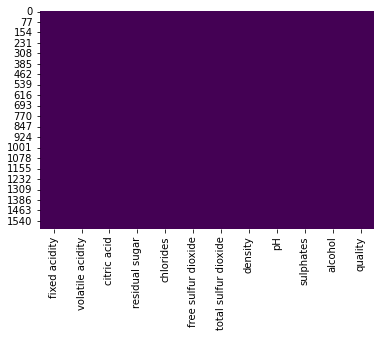

In [6]:
sns.heatmap(df.isnull(),cbar=False,cmap='viridis')

In [10]:
cat = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

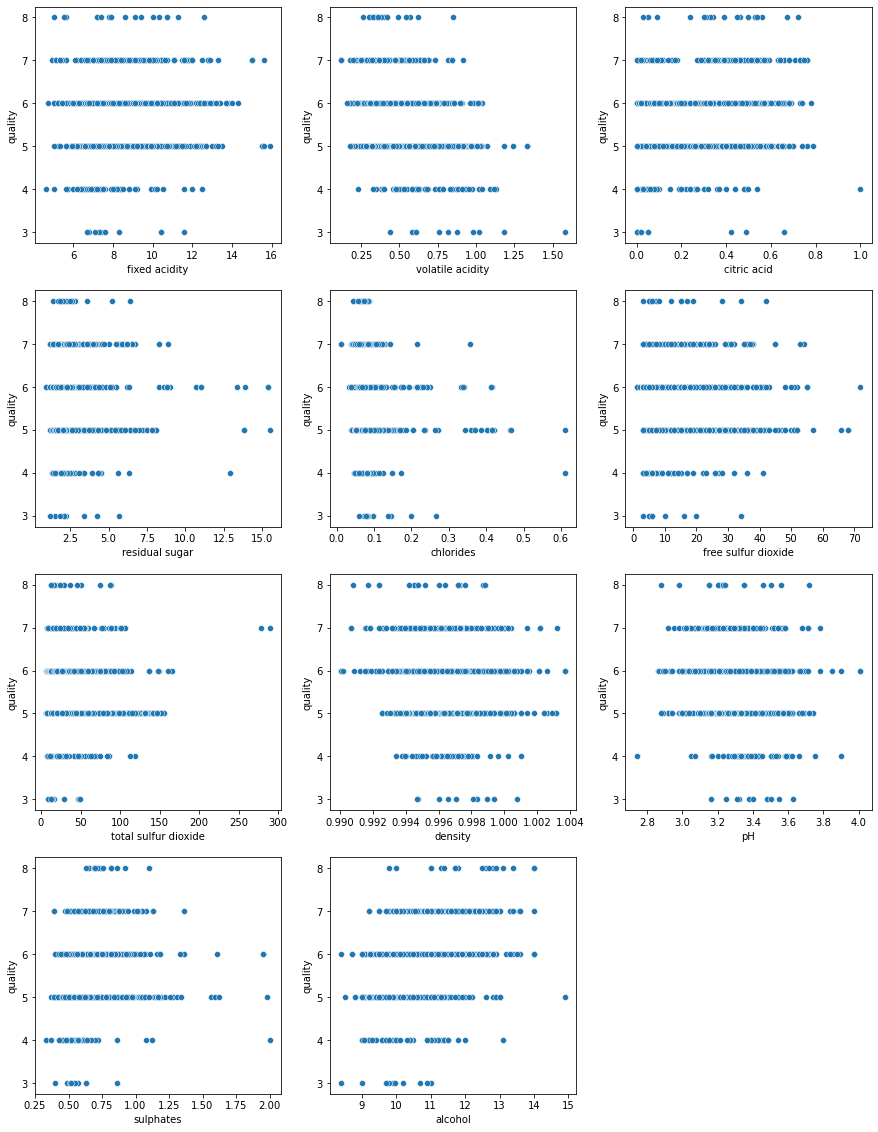

In [12]:
count=1
plt.subplots(figsize=(15, 20))
for i in cat:
    plt.subplot(4,3,count)
    sns.scatterplot(x=df[i],y=df['quality'])
    count+=1

plt.show()

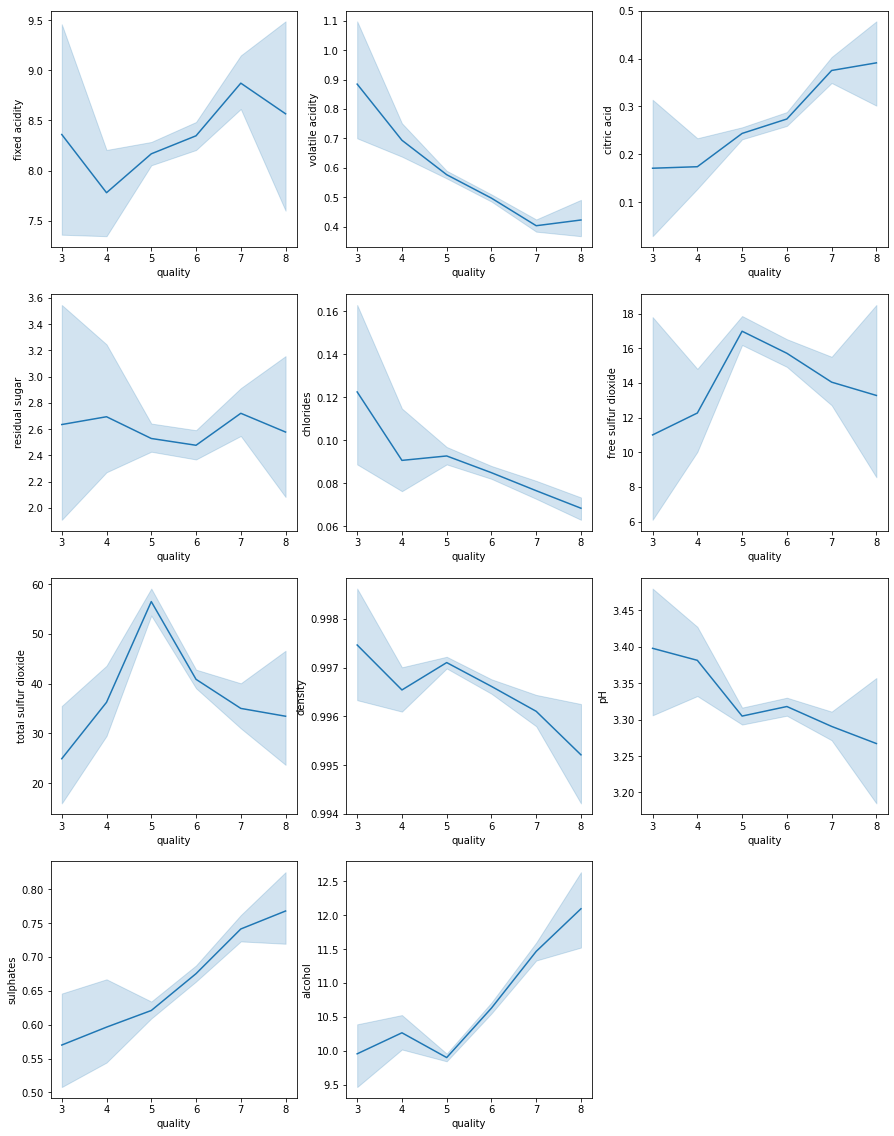

In [42]:
count=1
plt.subplots(figsize=(15, 20))
for i in cat:
    plt.subplot(4,3,count)
    sns.lineplot(y=df[i],x=df['quality'])
    count+=1

plt.show()

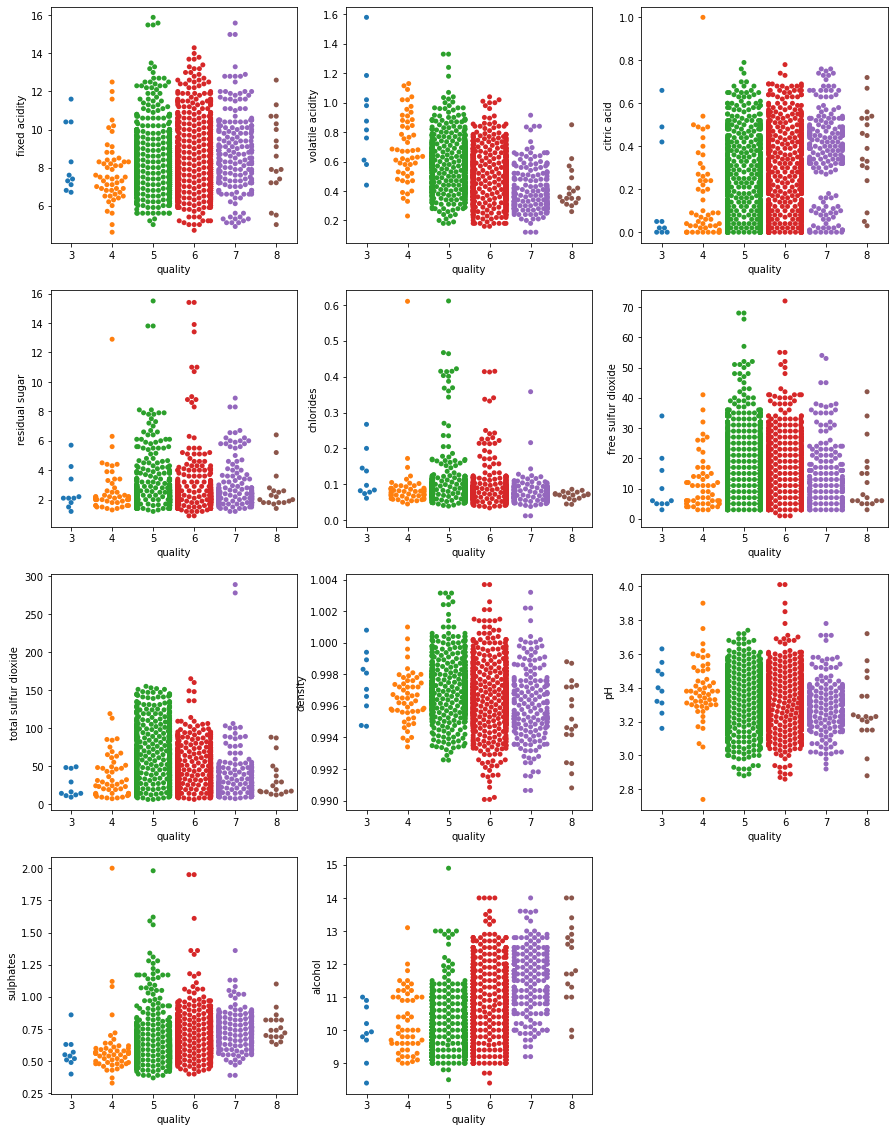

In [46]:
count=1
plt.subplots(figsize=(15, 20))
for i in cat:
    plt.subplot(4,3,count)
    sns.swarmplot(y=df[i],x=df['quality'])
    count+=1

plt.show()

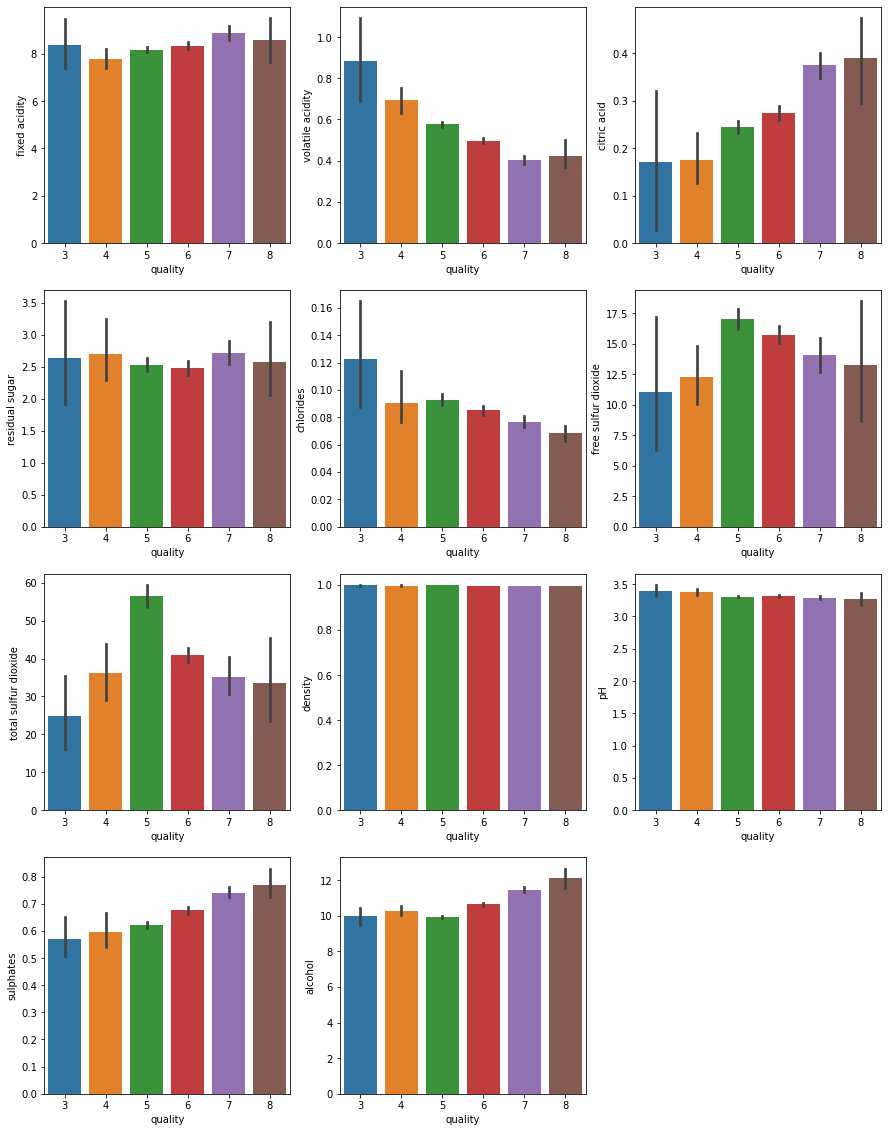

In [49]:
count=1
plt.subplots(figsize=(15, 20))
for i in cat:
    plt.subplot(4,3,count)
    sns.barplot(y=df[i],x=df['quality'])
    count+=1

plt.show()

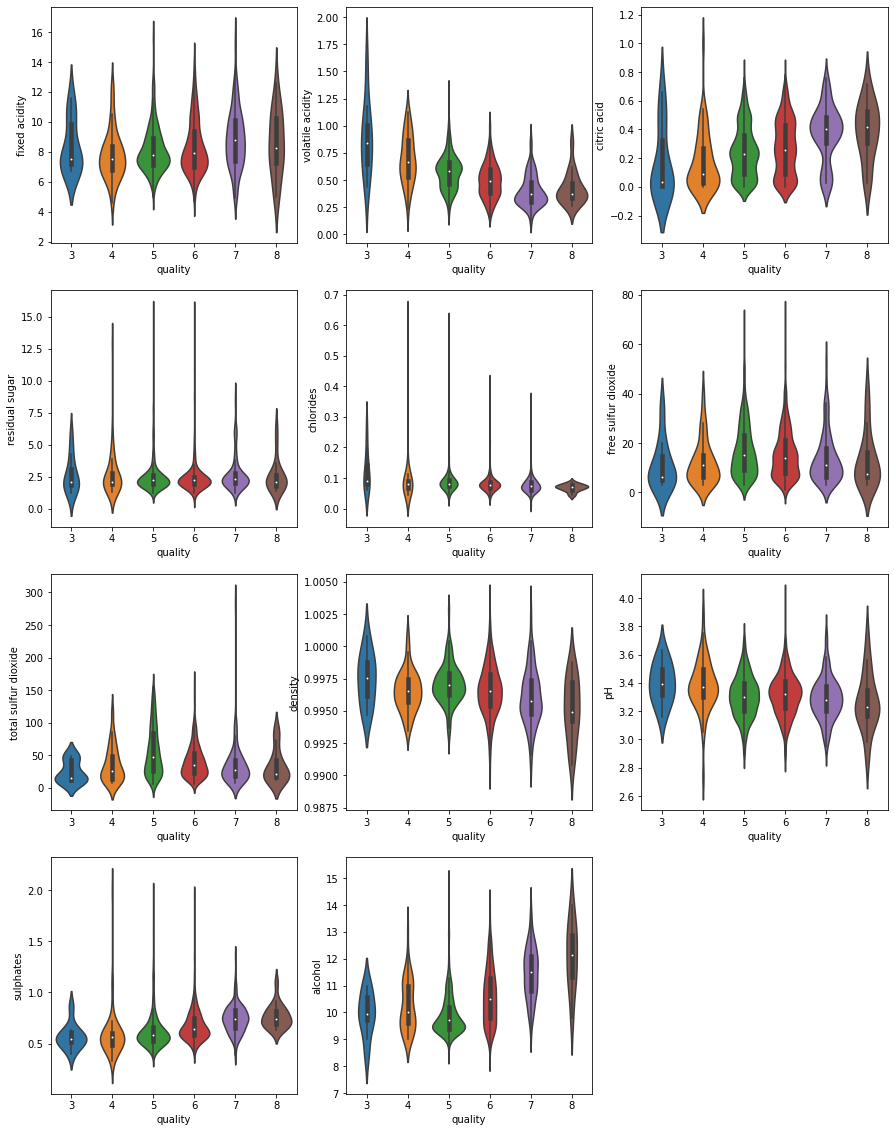

In [55]:
count=1
plt.subplots(figsize=(15, 20))
for i in cat:
    plt.subplot(4,3,count)
    sns.violinplot(y=df[i],x=df['quality'])
    count+=1

plt.show()

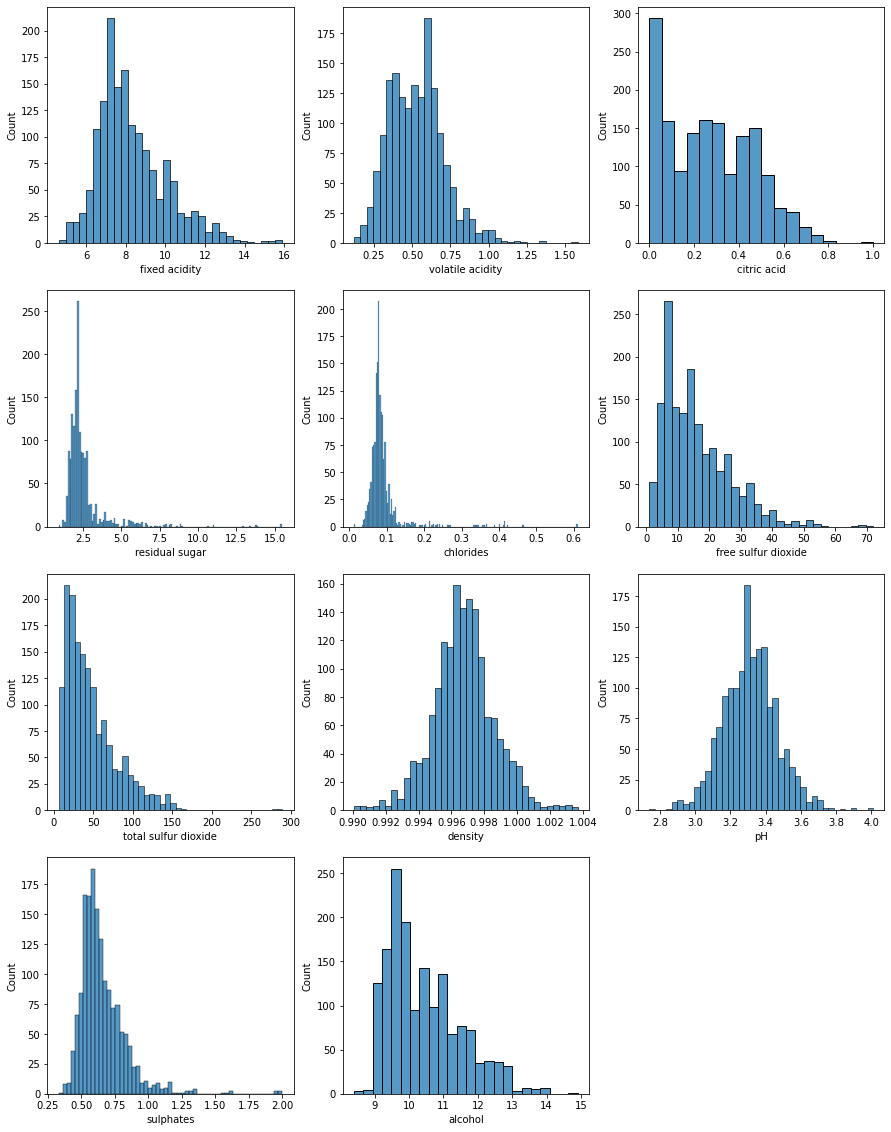

In [57]:
count=1
plt.subplots(figsize=(15, 20))
for i in cat:
    plt.subplot(4,3,count)
    sns.histplot(x=df[i])
    count+=1

plt.show()

In [58]:
df.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
fixed acidity,1.000000,-0.256131,0.671703,0.114777,0.093705,-0.153794,-0.113181,0.668047,-0.682978,0.183006,-0.061668,0.124052
volatile acidity,-0.256131,1.000000,-0.552496,0.001918,0.061298,-0.010504,0.076470,0.022026,0.234937,-0.260987,-0.202288,-0.390558
citric acid,0.671703,-0.552496,1.000000,0.143577,0.203823,-0.060978,0.035533,0.364947,-0.541904,0.312770,0.109903,0.226373
residual sugar,0.114777,0.001918,0.143577,1.000000,0.055610,0.187049,0.203028,0.355283,-0.085652,0.005527,0.042075,0.013732
chlorides,0.093705,0.061298,0.203823,0.055610,1.000000,0.005562,0.047400,0.200632,-0.265026,0.371260,-0.221141,-0.128907
free sulfur dioxide,-0.153794,-0.010504,-0.060978,0.187049,0.005562,1.000000,0.667666,-0.021946,0.070377,0.051658,-0.069408,-0.050656
total sulfur dioxide,-0.113181,0.076470,0.035533,0.203028,0.047400,0.667666,1.000000,0.071269,-0.066495,0.042947,-0.205654,-0.185100
density,0.668047,0.022026,0.364947,0.355283,0.200632,-0.021946,0.071269,1.000000,-0.341699,0.148506,-0.496180,-0.174919
pH,-0.682978,0.234937,-0.541904,-0.085652,-0.265026,0.070377,-0.066495,-0.341699,1.000000,-0.196648,0.205633,-0.057731
sulphates,0.183006,-0.260987,0.312770,0.005527,0.371260,0.051658,0.042947,0.148506,-0.196648,1.000000,0.093595,0.251397


<AxesSubplot:>

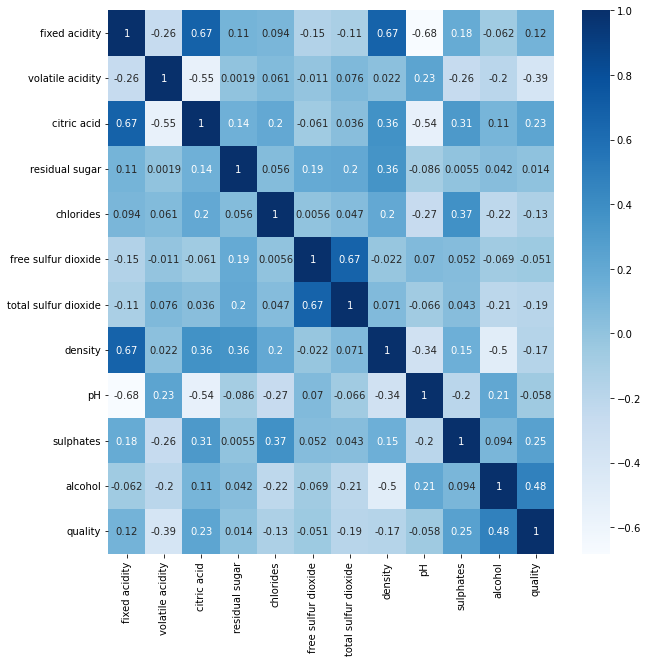

In [59]:
plt.figure(figsize=(10,10))
sns.heatmap(df.corr(),cbar=True,annot=True,cmap='Blues')

In [60]:
df.skew()

fixed acidity           0.982751
volatile acidity        0.671593
citric acid             0.318337
residual sugar          4.540655
chlorides               5.680347
free sulfur dioxide     1.250567
total sulfur dioxide    1.515531
density                 0.071288
pH                      0.193683
sulphates               2.428672
alcohol                 0.860829
quality                 0.217802
dtype: float64

In [62]:
for i in cat :
    if df.skew().loc[i]>0.60:
        df[i] = np.log1p(df[i])

In [63]:
df.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          2.255076
chlorides               5.071476
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               1.610497
alcohol                 0.677798
quality                 0.217802
dtype: float64

In [68]:
for i in cat :
    if df.skew().loc[i]>0.60:
        df[i] = np.sqrt(df[i])

In [69]:
df.skew()

fixed acidity           0.455743
volatile acidity        0.270168
citric acid             0.318337
residual sugar          1.356380
chlorides               1.854331
free sulfur dioxide    -0.097399
total sulfur dioxide   -0.035746
density                 0.071288
pH                      0.193683
sulphates               0.781249
alcohol                 0.614256
quality                 0.217802
dtype: float64

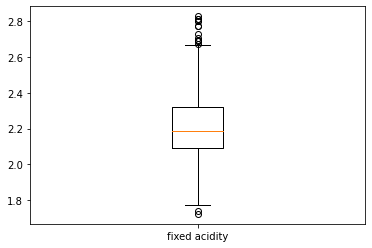

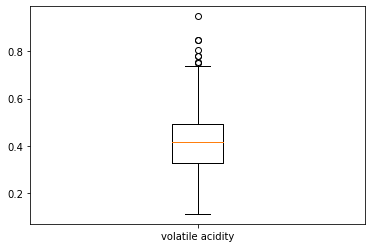

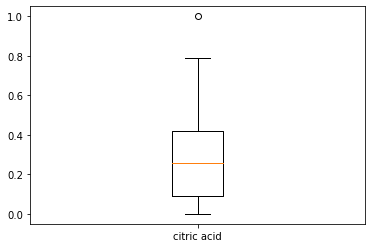

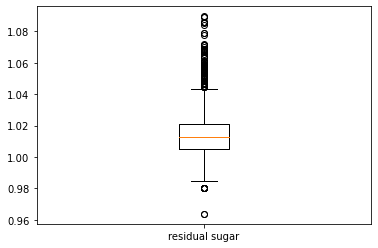

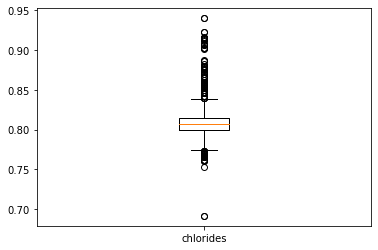

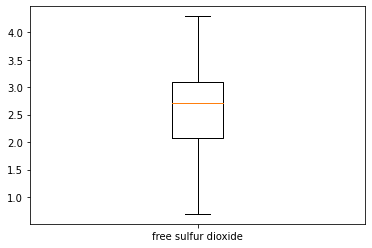

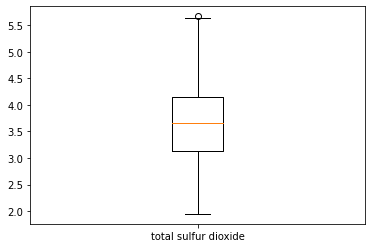

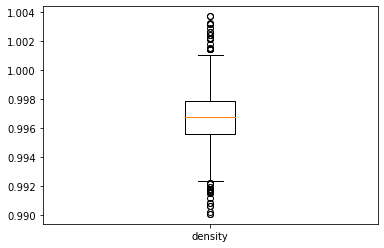

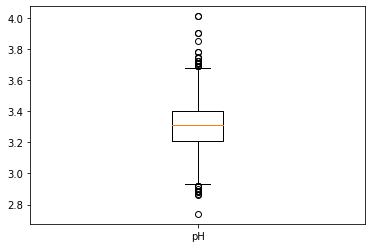

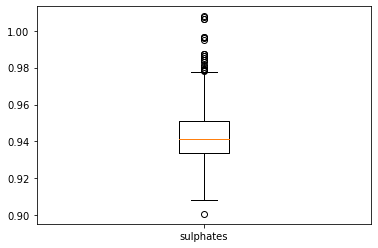

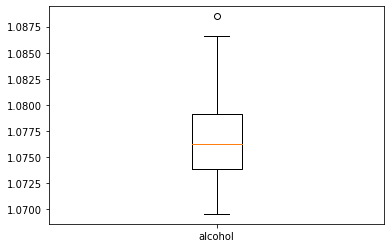

In [71]:
for i in cat:
    plt.boxplot(df[i], labels = [i])
    plt.show()

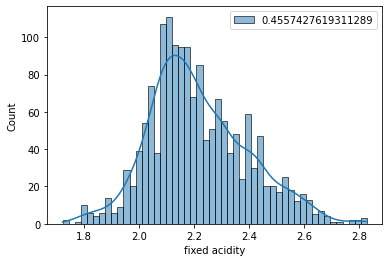

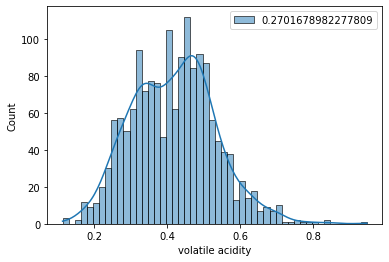

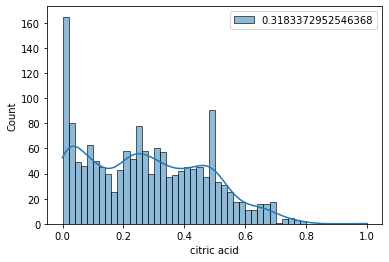

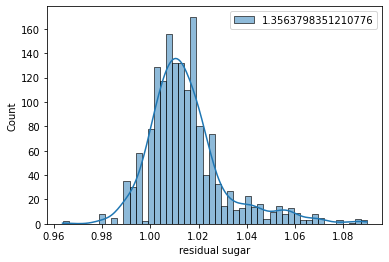

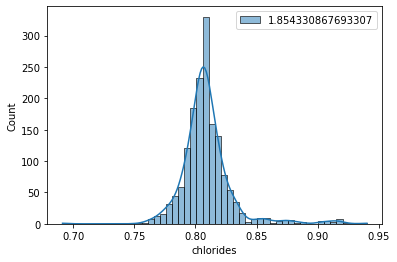

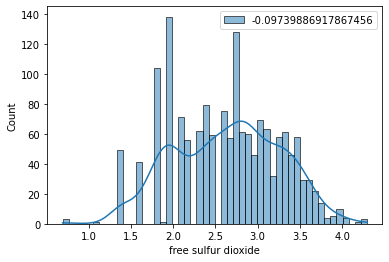

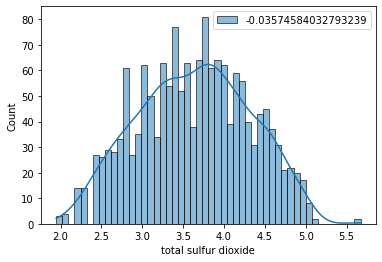

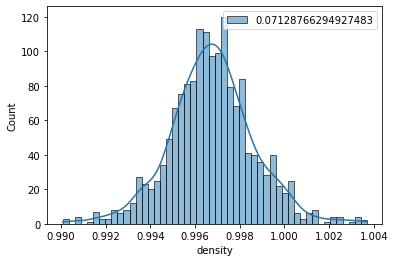

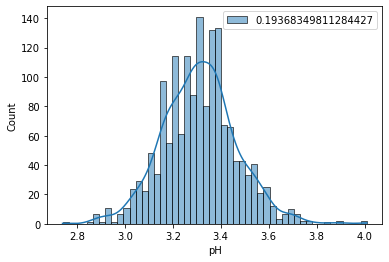

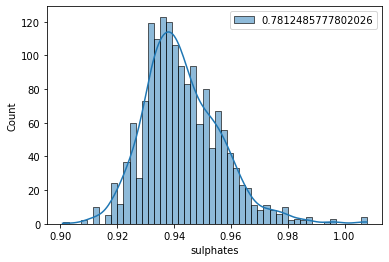

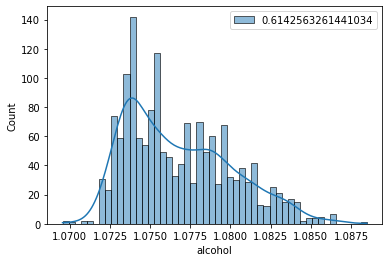

In [72]:
for i in cat:
    sns.histplot(df[i], kde = True, bins = 50, label = df[i].skew())
    plt.legend(loc = 'upper right')
    plt.show()

In [74]:
for i in cat:
    Q1,Q3 = np.percentile(df[i] , [25,75])
    IQR = Q3 - Q1
    lower_range = Q1 - (1.5 * IQR)
    upper_range = Q3 + (1.5 * IQR)
    df_no_outliers = df[(df[i] < lower_range) | (df[i] > upper_range)]

In [75]:
df_no_outliers

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
652,2.827314,0.307485,0.65,1.065456,0.819441,3.135494,4.276666,0.9976,2.98,0.959615,1.088492,5


In [76]:
z = np.abs(zscore(df))
threshold = 3
print(np.where(z<3))
print(df.shape)

(array([   0,    0,    0, ..., 1598, 1598, 1598], dtype=int64), array([ 0,  1,  2, ...,  9, 10, 11], dtype=int64))
(1599, 12)


In [77]:
df_new = df[(z<3).all(axis = 1)]
df_new.shape

(1489, 12)

In [78]:
df.shape

(1599, 12)

In [79]:
X = df_new.drop(['quality'],axis=1)
y = df_new['quality']

In [80]:
from sklearn.preprocessing import StandardScaler

In [81]:
for i in X.columns:
    scaler = StandardScaler()
    X[i] = scaler.fit_transform(X[i].values.reshape(-1, 1))

In [82]:
reg_model = [LinearRegression(),GradientBoostingRegressor(),AdaBoostRegressor(),DecisionTreeRegressor(),KNeighborsRegressor(),ExtraTreesRegressor(),RandomForestRegressor()]
max_r2_score = 0
for r_state in range(42,95):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for i in reg_model:
        i.fit(X_train,y_train)
        pred = i.predict(X_test)
        r2_scores = r2_score(y_test,pred)
        print("R2 score for the random state is" ,r_state ,"is", r2_scores)
        if r2_scores > max_r2_score:
            max_r2_score = r2_scores
            final_state = r_state
            final_model = i
print()
print()
print()
print()
print("Maximum R2 score in the random state " ,final_state , "is" , max_r2_score ,"and model is",final_model)

R2 score for the random state is 42 is 0.4109746696237887
R2 score for the random state is 42 is 0.4304038285508298
R2 score for the random state is 42 is 0.3984939601090616
R2 score for the random state is 42 is -0.040534582529622165
R2 score for the random state is 42 is 0.29650372003306724
R2 score for the random state is 42 is 0.5062344805731607
R2 score for the random state is 42 is 0.49435103334251873
R2 score for the random state is 43 is 0.3708847260167827
R2 score for the random state is 43 is 0.4153058408520667
R2 score for the random state is 43 is 0.3858618975374104
R2 score for the random state is 43 is 0.1316909279873456
R2 score for the random state is 43 is 0.3336531862184371
R2 score for the random state is 43 is 0.5213976873852029
R2 score for the random state is 43 is 0.4720539339943919
R2 score for the random state is 44 is 0.3623552921701658
R2 score for the random state is 44 is 0.4041149694130415
R2 score for the random state is 44 is 0.37349662345146706
R2 score

In [83]:
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 1000, num = 10)]
max_features = ['auto', 'sqrt','log2']
max_depth = [int(x) for x in np.linspace(10, 1000,10)]
min_samples_split = [2, 5, 10,14]
min_samples_leaf = [1, 2, 4,6,8]

In [84]:
param_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
              }
print(param_grid)

{'n_estimators': [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000], 'max_features': ['auto', 'sqrt', 'log2'], 'max_depth': [10, 120, 230, 340, 450, 560, 670, 780, 890, 1000], 'min_samples_split': [2, 5, 10, 14], 'min_samples_leaf': [1, 2, 4, 6, 8]}


In [85]:
ETR=ExtraTreesRegressor()
RandomizedSearch_ETR=RandomizedSearchCV(estimator=ETR,param_distributions=param_grid,n_iter=100,cv=3,verbose=2,
                               random_state=78,n_jobs=-1)
RandomizedSearch_ETR.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=ExtraTreesRegressor(), n_iter=100, n_jobs=-1,
                   param_distributions={'max_depth': [10, 120, 230, 340, 450,
                                                      560, 670, 780, 890,
                                                      1000],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 5, 10, 14],
                                        'n_estimators': [100, 200, 300, 400,
                                                         500, 600, 700, 800,
                                                         900, 1000]},
                   random_state=78, verbose=2)

In [86]:
RandomizedSearch_ETR.best_params_

{'n_estimators': 900,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 450}

In [87]:
RandomizedSearch_ETR.best_estimator_

ExtraTreesRegressor(max_depth=450, max_features='sqrt', n_estimators=900)

In [88]:
ETR = ExtraTreesRegressor(n_estimators=900,min_samples_split=2,min_samples_leaf=1,max_features='sqrt',max_depth=450,random_state=78)
ETR.fit(X_train,y_train)
pred = ETR.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 48.18385591392791


In [89]:
print('Mean Absolute Error: ', mean_absolute_error(y_test,pred))
print('Mean squared Error: ', mean_squared_error(y_test,pred))
print('Root Mean Absolute Error: ', np.sqrt(mean_absolute_error(y_test,pred)))

Mean Absolute Error:  0.3945483288166215
Mean squared Error:  0.32352124861989356
Root Mean Absolute Error:  0.6281308214190906


Text(0, 0.5, 'Predicted_Y')

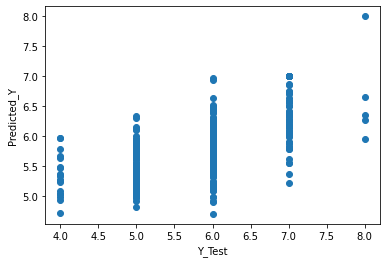

In [90]:
plt.scatter(x=y_test,y=pred)
plt.xlabel('Y_Test')
plt.ylabel('Predicted_Y')

<AxesSubplot:>

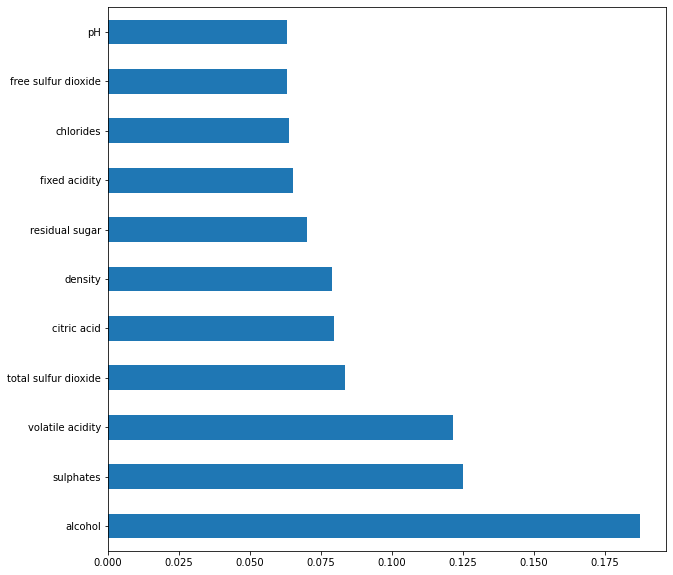

In [91]:
plt.figure(figsize=(10,10))
feat_importances = pd.Series(ETR.feature_importances_, index=X_train.columns)
feat_importances.nlargest(70).plot(kind='barh')

In [92]:
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix,roc_auc_score,roc_curve
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import AdaBoostClassifier,GradientBoostingClassifier

In [93]:
classification_model = [DecisionTreeClassifier(),KNeighborsClassifier()]
max_accuracy_score = 0
for r_state in range(40,90):
    X_train, X_test, y_train, y_test = train_test_split(X, y,random_state = r_state,test_size = 0.33)
    for j in classification_model:
        j.fit(X_train,y_train)
        pred_c = j.predict(X_test)
        ac_score = accuracy_score(y_test,pred_c)
        print("accuracy score correspond to random state " ,r_state ,"is", ac_score)
        if ac_score> max_accuracy_score:
            max_accuracy_score=ac_score
            final_state = r_state
            final_model_classification = j
            
print()
print()
print()
print()

print("max accuracy score correspond to random state " ,final_state , "is" , max_accuracy_score ,"and model is",final_model_classification)

accuracy score correspond to random state  40 is 0.6016260162601627
accuracy score correspond to random state  40 is 0.5873983739837398
accuracy score correspond to random state  41 is 0.6016260162601627
accuracy score correspond to random state  41 is 0.5772357723577236
accuracy score correspond to random state  42 is 0.6280487804878049
accuracy score correspond to random state  42 is 0.5853658536585366
accuracy score correspond to random state  43 is 0.6219512195121951
accuracy score correspond to random state  43 is 0.5995934959349594
accuracy score correspond to random state  44 is 0.5853658536585366
accuracy score correspond to random state  44 is 0.6239837398373984
accuracy score correspond to random state  45 is 0.6056910569105691
accuracy score correspond to random state  45 is 0.5630081300813008
accuracy score correspond to random state  46 is 0.5873983739837398
accuracy score correspond to random state  46 is 0.5589430894308943
accuracy score correspond to random state  47 is

In [94]:
params = {
    'max_depth': [2, 3, 5, 10, 20],
    'min_samples_leaf': [5, 10, 20, 50, 100],
    'criterion': ["gini", "entropy"]
}

In [96]:
dec = DecisionTreeClassifier(random_state=81)
grid_search = GridSearchCV(estimator=dec, 
                           param_grid=params, 
                           cv=4, n_jobs=-1, verbose=1, scoring = "accuracy")

In [97]:
grid_search.fit(X_train, y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


GridSearchCV(cv=4, estimator=DecisionTreeClassifier(random_state=81), n_jobs=-1,
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [2, 3, 5, 10, 20],
                         'min_samples_leaf': [5, 10, 20, 50, 100]},
             scoring='accuracy', verbose=1)

In [98]:
grid_search.best_estimator_

DecisionTreeClassifier(max_depth=10, min_samples_leaf=5, random_state=81)

In [99]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 10, 'min_samples_leaf': 5}

In [100]:
DTC = DecisionTreeClassifier(criterion='gini',max_depth=10, min_samples_leaf=5, random_state=81)
DTC.fit(X_train,y_train)
predc = DTC.predict(X_test)
acurracy_score = accuracy_score(y_test,predc)
print("Accuracy Score :",acurracy_score*100)

Accuracy Score : 58.739837398373986


In [101]:
pred_prob = DTC.predict_proba(X_test)[:,1]

In [102]:
fpr,tpr,thresholds = roc_curve(y_test,pred_prob,pos_label=True)

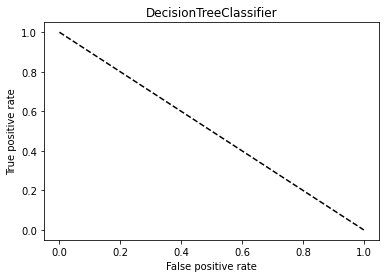

In [103]:
plt.plot([0,1],[1,0],'k--')
plt.plot(fpr,tpr,label = 'DecisionTreeClassifier')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('DecisionTreeClassifier')
plt.show()

In [104]:
confusion_matrix(y_test, predc)

array([[  0,   7,   5,   0,   0],
       [  2, 133,  79,   7,   0],
       [  2,  43, 126,  13,   1],
       [  0,   2,  29,  30,   4],
       [  0,   0,   5,   4,   0]], dtype=int64)

[Text(0.48193359375, 0.9545454545454546, 'X[10] <= -0.431\ngini = 0.637\nsamples = 997\nvalue = [37, 419, 411, 122, 8]'),
 Text(0.25753348214285715, 0.8636363636363636, 'X[6] <= 1.476\ngini = 0.475\nsamples = 409\nvalue = [17, 273, 114, 4, 1]'),
 Text(0.15792410714285715, 0.7727272727272727, 'X[9] <= -0.847\ngini = 0.509\nsamples = 352\nvalue = [16, 219, 112, 4, 1]'),
 Text(0.05803571428571429, 0.6818181818181818, 'X[1] <= -1.074\ngini = 0.367\nsamples = 99\nvalue = [7, 77, 15, 0, 0]'),
 Text(0.049107142857142856, 0.5909090909090909, 'gini = 0.49\nsamples = 7\nvalue = [0, 3, 4, 0, 0]'),
 Text(0.06696428571428571, 0.5909090909090909, 'X[10] <= -0.866\ngini = 0.333\nsamples = 92\nvalue = [7, 74, 11, 0, 0]'),
 Text(0.03571428571428571, 0.5, 'X[10] <= -1.324\ngini = 0.204\nsamples = 63\nvalue = [4, 56, 3, 0, 0]'),
 Text(0.026785714285714284, 0.4090909090909091, 'gini = 0.611\nsamples = 6\nvalue = [2, 3, 1, 0, 0]'),
 Text(0.044642857142857144, 0.4090909090909091, 'X[0] <= 0.019\ngini = 0.13

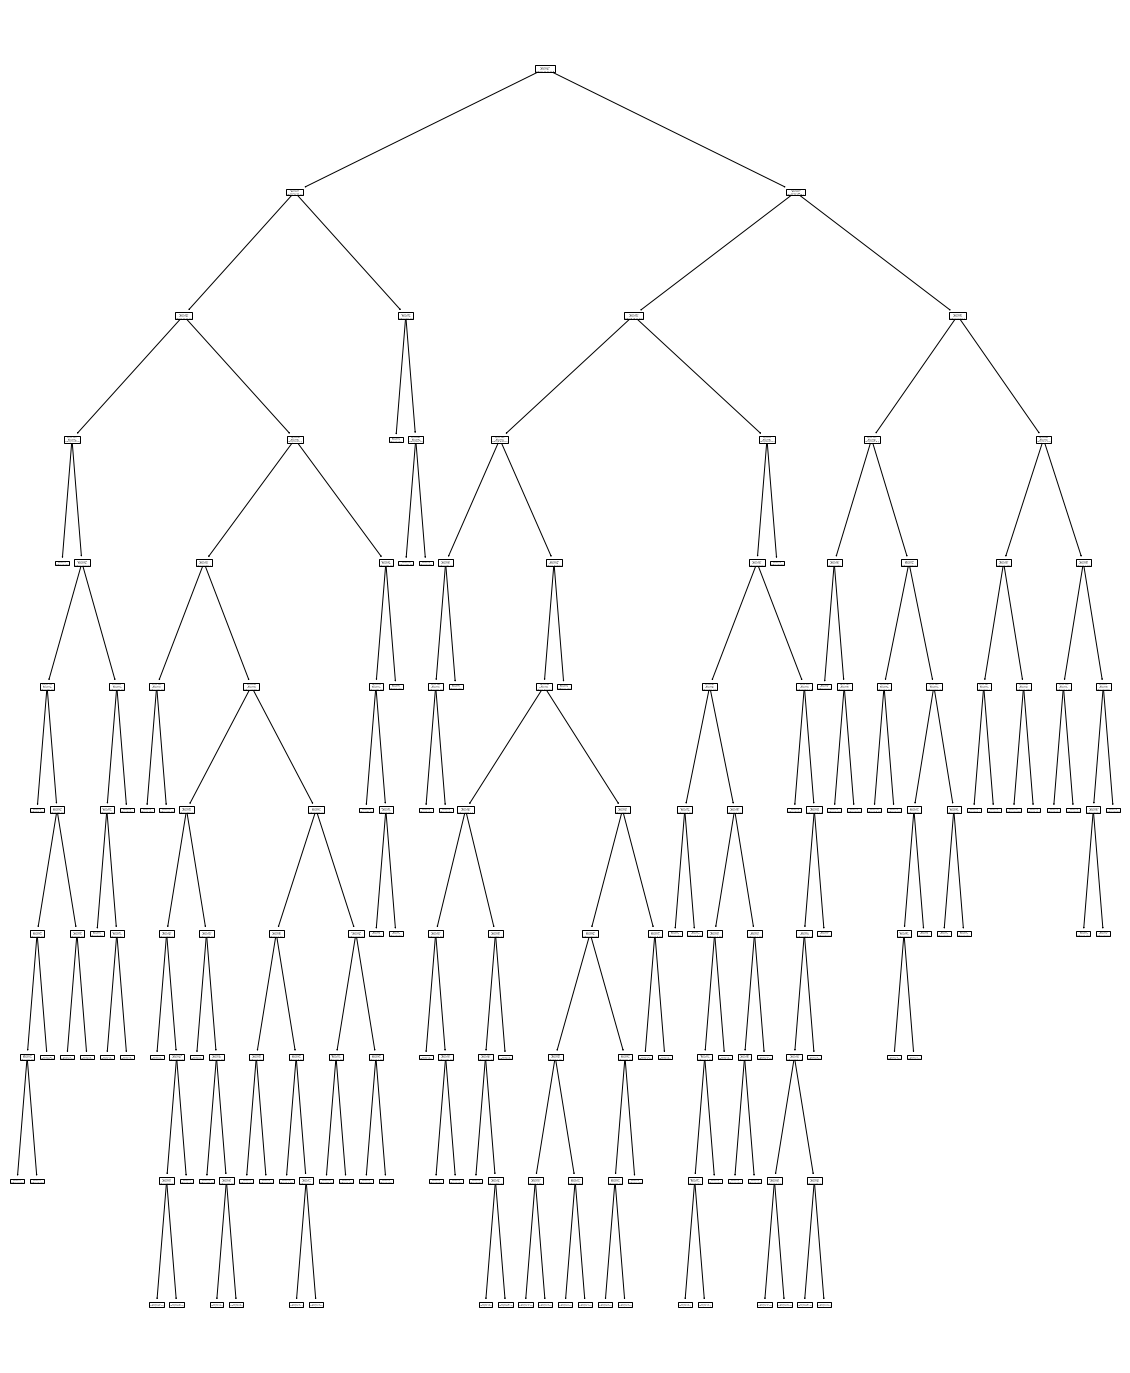

In [105]:
from sklearn import tree
g = plt.figure()
g.set_figwidth(20)
g.set_figheight(25)
tree.plot_tree(DTC)

### Pipeline

### Pipeline with 5 features

In [115]:
from sklearn.pipeline import Pipeline,make_pipeline
pipeline_etr=Pipeline([('scalar1',StandardScaler()),
                     ('pca1',PCA(n_components=5)),
                     ('lr_regressor',ExtraTreesRegressor())])

In [116]:
pipeline_rf=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=5)),
                     ('rf_regressor',RandomForestRegressor())])

In [117]:
pipeline_dtc=Pipeline([('scalar2',StandardScaler()),
                     ('pca2',PCA(n_components=5)),
                     ('rf_regressor',DecisionTreeClassifier())])

In [118]:
pipelines = [pipeline_etr, pipeline_rf,pipeline_dtc]

In [119]:
best_accuracy=0.0
best_classifier=0
best_pipeline=""

In [120]:
pipe_dict = {0: 'ExtraTrees Regressorn',1:'RandomForest',2:'DecisionTreeClassifier'}

for pipe in pipelines:
    pipe.fit(X_train, y_train)

In [121]:
pred = pipe.predict(X_test)
r2_scores = r2_score(y_test,pred)
print("R2 Score :",r2_scores*100)

R2 Score : 10.313486867442013
